## Final Project Submission

Please fill out:
* Student name: Jesicah Mutiso
* Student pace: part time 
* Scheduled project review date/time: 10th September 2024
* Instructor name: William Okomba
* Blog post URL:


## Importing the necessary libraries and loading the dataset

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv(r"C:\Users\jessm\OneDrive\Desktop\project 1\archive\AviationData.csv" ,encoding='ISO-8859-1', low_memory=False)

dataset.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data cleaning

remove outliers

dropping irrelent columns and replacing missing values in the relevant ones i.e
Aircraft Model
Total Fatal Injuries
Total Serious Injuries
Purpose of Flight
Weather Condition
Phase of Flight


In [367]:
missing_values = dataset.isnull().sum()
print(missing_values)



Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [392]:
dataset['Event.Date'] = pd.to_datetime(dataset['Event.Date'], errors='coerce' , dayfirst=False)
dataset['Publication.Date'] = pd.to_datetime(dataset['Publication.Date'], errors='coerce' , dayfirst=False)


dataset['Injury.Severity'] = dataset['Injury.Severity'].fillna('Unknown')
dataset['Weather.Condition'] = dataset['Weather.Condition'].fillna('Unknown')



dataset['Total.Fatal.Injuries'] = pd.to_numeric(dataset['Total.Fatal.Injuries'], errors='coerce')
dataset['Total.Serious.Injuries'] = pd.to_numeric(dataset['Total.Serious.Injuries'], errors='coerce')


dataset['Purpose.of.flight'] = dataset['Purpose.of.flight'].astype('category')


dataset['Purpose.of.flight'] = dataset['Purpose.of.flight'].fillna('Unknown')



injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
dataset[injury_columns] = dataset[injury_columns].fillna(0)


dataset_cleaned = dataset.dropna(subset=['Make', 'Model'])


dataset_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88777 non-null  object        
 1   Investigation.Type      88777 non-null  object        
 2   Accident.Number         88777 non-null  object        
 3   Event.Date              88777 non-null  datetime64[ns]
 4   Location                88725 non-null  object        
 5   Country                 88552 non-null  object        
 6   Latitude                34347 non-null  object        
 7   Longitude               34338 non-null  object        
 8   Airport.Code            50096 non-null  object        
 9   Airport.Name            52660 non-null  object        
 10  Injury.Severity         88777 non-null  object        
 11  Aircraft.damage         85605 non-null  object        
 12  Aircraft.Category       32245 non-null  object     

In [369]:

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


dataset_cleaned= remove_outliers(dataset_cleaned, 'Total.Fatal.Injuries')
dataset_cleaned = remove_outliers(dataset_cleaned, 'Total.Serious.Injuries')


print(dataset_cleaned.describe())



                          Event.Date  Number.of.Engines  Total.Fatal.Injuries  \
count                          59815       56567.000000               59815.0   
mean   1999-04-10 07:13:24.500543360           1.143953                   0.0   
min              1979-09-17 00:00:00           0.000000                   0.0   
25%              1988-08-25 00:00:00           1.000000                   0.0   
50%              1997-12-26 00:00:00           1.000000                   0.0   
75%              2008-08-12 12:00:00           1.000000                   0.0   
max              2022-12-26 00:00:00           8.000000                   0.0   
std                              NaN           0.445225                   0.0   

       Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  \
count                 59815.0          59815.000000     59815.000000   
mean                      0.0              0.304572         6.039271   
min                       0.0              0.000000   

In [370]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59815 entries, 5 to 88887
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                59815 non-null  object        
 1   Investigation.Type      59815 non-null  object        
 2   Accident.Number         59815 non-null  object        
 3   Event.Date              59815 non-null  datetime64[ns]
 4   Location                59785 non-null  object        
 5   Country                 59688 non-null  object        
 6   Latitude                22162 non-null  object        
 7   Longitude               22151 non-null  object        
 8   Airport.Code            37054 non-null  object        
 9   Airport.Name            39034 non-null  object        
 10  Injury.Severity         59815 non-null  object        
 11  Aircraft.damage         57684 non-null  object        
 12  Aircraft.Category       21497 non-null  object     

In [371]:
dataset_cleaned=dataset[dataset['Latitude'].notna()]

dataset_cleaned.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2007-02-26
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,Unknown,Air Canada,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,2017-09-19
593,20080417X00504,Accident,MIA08CA076,1982-03-16,"MOBILE, AL",United States,30.757778,-88.355555,MOB,MOBILE REGIONAL,...,Unknown,NaN,1.0,0.0,0.0,0.0,IMC,Landing,Probable Cause,2008-04-30
3654,20051208X01953,Accident,SEA83LA209,1983-01-08,"Goldendale, WA",United States,46.041111,-120.849722,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause,2006-03-28
6202,20020904X01525,Accident,SEA83FA208,1983-09-09,"Kalispell, MT",United States,48.12,-113.8875,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2003-07-23


In [372]:
dataset_cleaned.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,Unknown,NaN,0.0,0.0,0.0,1.0,Unknown,NaN,NaN,2022-12-14
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,Personal,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,2022-12-27
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,Unknown,NaN,0.0,0.0,0.0,1.0,Unknown,NaN,NaN,2022-12-19
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,Personal,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,2022-12-23
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,2022-12-27


In [373]:
dataset_cleaned =dataset[dataset['Broad.phase.of.flight'].notna()]

dataset_cleaned.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,1980-04-16
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,Unknown,Air Canada,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,2017-09-19
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,2001-11-06
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982-01-01
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,1982-01-01
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,1982-01-01


## DATA VISUALISATION

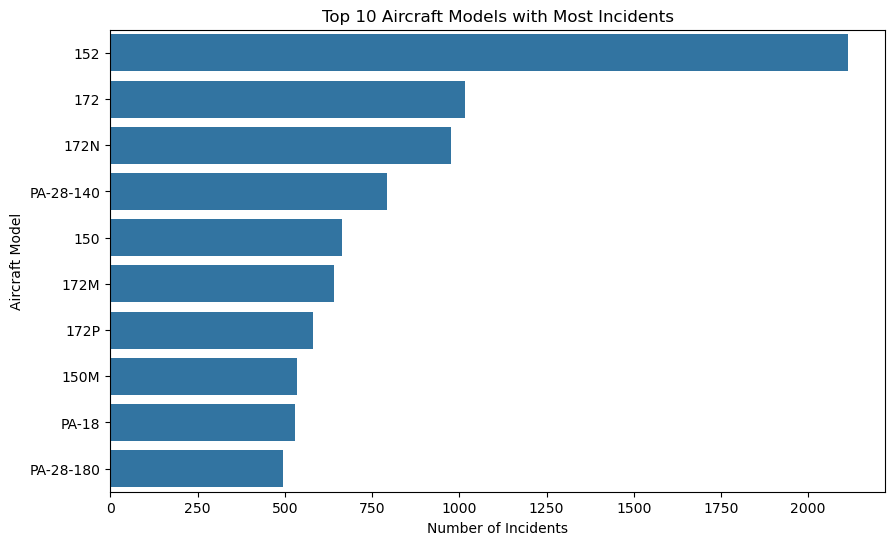

In [375]:

# Group by aircraft model and count incidents
model_incident_counts = dataset_cleaned.groupby('Model')['Accident.Number'].count().reset_index()
model_incident_counts.columns = ['Aircraft Model', 'Incident Count']
model_incident_counts.sort_values(by='Incident Count', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Incident Count', y='Aircraft Model', data=model_incident_counts.head(10))  # Top 10 models
plt.title('Top 10 Aircraft Models with Most Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Aircraft Model')
plt.show()


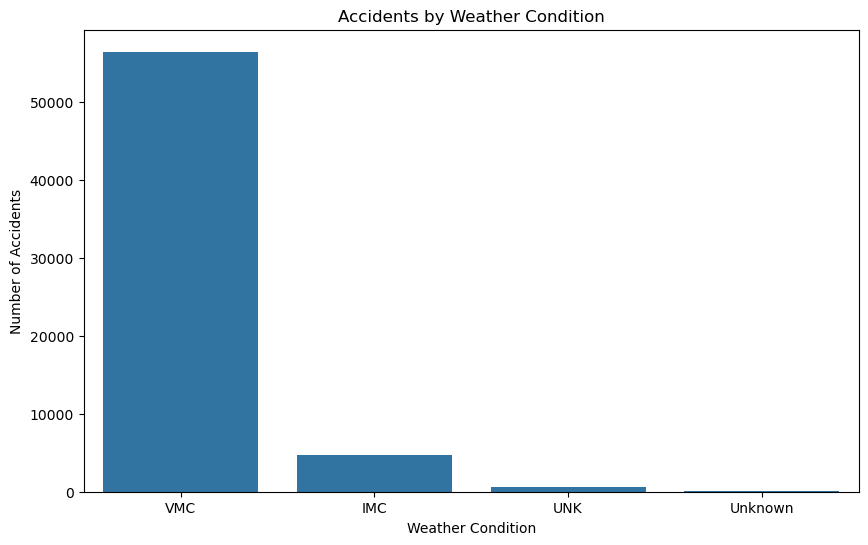

In [376]:
plt.figure(figsize=(10,6))
sns.countplot(data=dataset_cleaned, x='Weather.Condition', order=dataset_cleaned['Weather.Condition'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()


C:\Users\jessm\AppData\Local\Temp\ipykernel_7616\889547405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cleaned['Year'] = dataset_cleaned['Event.Date'].dt.year


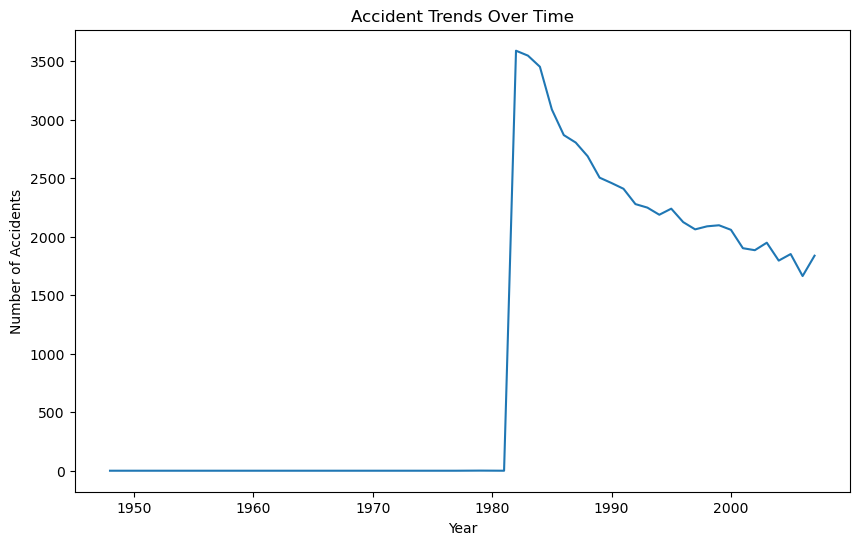

In [377]:
# extract year
dataset_cleaned['Year'] = dataset_cleaned['Event.Date'].dt.year

# Group by year
yearly_accidents = dataset_cleaned.groupby('Year')['Accident.Number'].count().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Accident.Number', data=yearly_accidents)
plt.title('Accident Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()


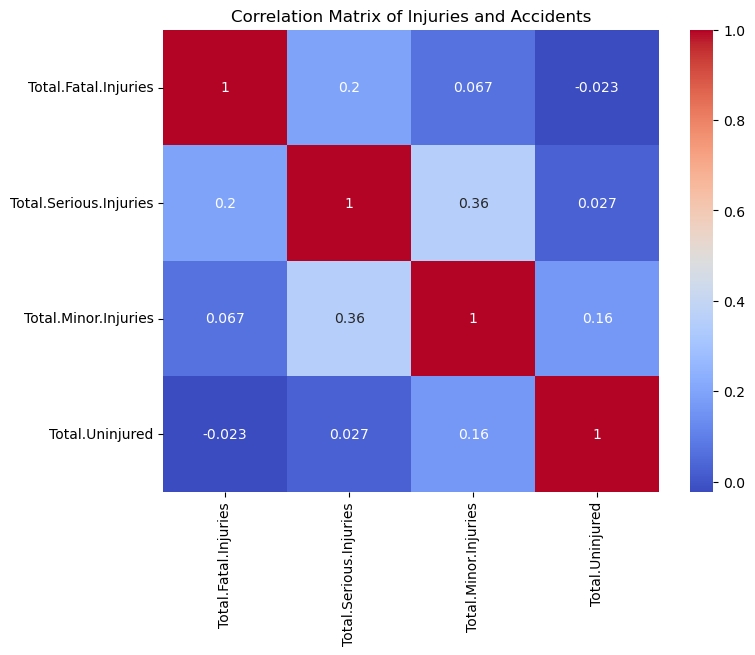

In [378]:
# Select relevant columns for correlation analysis
correlation_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
correlation_data = dataset_cleaned[correlation_columns].dropna()

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Injuries and Accidents')
plt.show()
